In [46]:
import numpy as np
import json
from matplotlib import pyplot as plt 

In [22]:
metrics = [
    [0.5, 0.6, 0.7, 0.2, 0.6, 0],
    [0.2, 0.5, 0, 0.7, 0.8, 0.2]
]
metrics = [
    [1,1,1],
    [0.6,0.4,0.5],
    [0.7,0.9,0.6]
]
print(metrics)

[[1, 1, 1], [0.6, 0.4, 0.5], [0.7, 0.9, 0.6]]


In [23]:
dim = 2
metricsMean = np.mean(metrics)
metricsCentered = metrics - metricsMean

metricsCov = np.cov(metricsCentered.T)

eigenVal, eigenVec = np.linalg.eig(metricsCov)

topMIdx = np.argsort(eigenVal)[::-1][:dim]
topMEigenVec = eigenVec[:,topMIdx]

np.dot(metricsMean, topMEigenVec)  


array([[-0.33848604,  0.28475385],
       [-0.51066855, -0.54076056],
       [-0.42289759,  0.4250774 ]])

In [24]:
# Import necessary libraries
from sklearn import datasets # to retrieve the iris Dataset
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns  # to plot the heat maps

In [25]:
#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<Axes: >

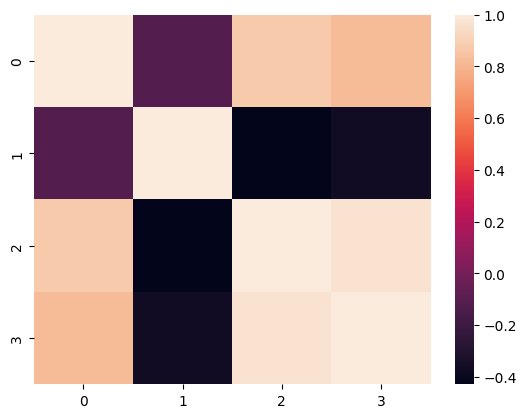

In [27]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [28]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


<Axes: >

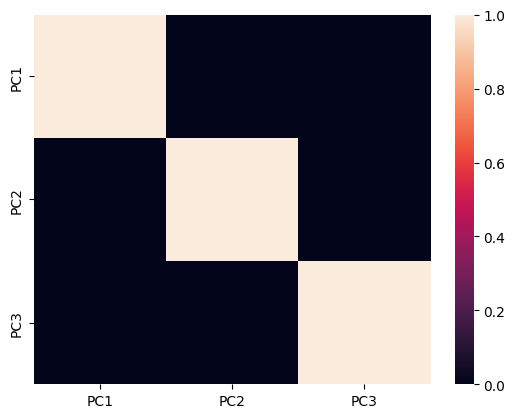

In [29]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

---
<h3>Reducing Metrics Dimensions</h3>

In [30]:
print("Loading File")
file = open("rust-articles-backup-metrics.json", encoding="utf8")
metricArticles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

Loading File
File Loaded


In [31]:
metrics = metricArticles.filter(items=['quoteBased','sentiment','sensationalized','mudslinging','spin','informal'])
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(metrics),columns=['quoteBased','sentiment','sensationalized','mudslinging','spin','informal']) #scaling the data
scaled_data.head()

,quoteBased,sentiment,sensationalized,mudslinging,spin,informal
0,1.603892,-0.471292,-0.592194,0.652678,-1.304329,-1.097068
1,-0.049671,0.037397,-0.592194,2.595564,1.297030,-1.592250
2,3.916803,1.029064,-0.592194,-0.362079,-0.920383,-0.224173
3,1.085097,-1.148991,-0.592194,3.337302,-1.304329,-0.887186
4,0.474219,1.010667,-0.592194,-0.298563,-1.304329,-0.038086


<Axes: >

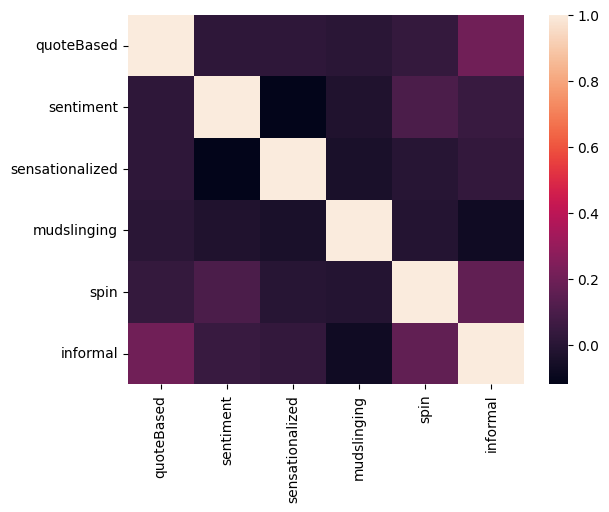

In [32]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [33]:
#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-0.837597,0.190418
1,-0.903680,-1.441213
2,1.653415,0.137619
3,-1.672499,0.019187
4,-0.065536,-0.623415


<Axes: >

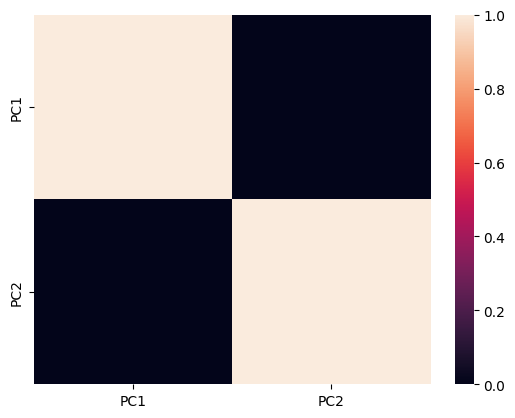

In [34]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

---
<h3>Displaying Labeled Principal Components</h3>

In [35]:
print("Loading File")
file = open("rust-articles-backup-metrics-labels-small.json", encoding="utf8")
labelArticles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

Loading File
File Loaded


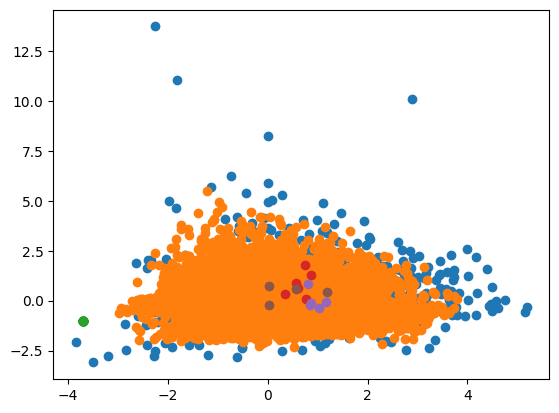

In [74]:
labels = labelArticles[labelArticles['label'].notna()]['label']
labelsCount = len(set(labels))
for i in range(labelsCount):
    i = i - 1
    pc1 = []
    pc2 = []
    for j in range(len(labels)):
        if labels[j] == i:
            pc1.append(data_pca.iloc[j]['PC1'])
            pc2.append(data_pca.iloc[j]['PC2'])
    plt.scatter(pc1,pc2) 
plt.show()